## Using ANOVA for hypothesis testing

In [68]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [38]:
#df = pd.DataFrame({'A':[25, 30, 28, 36, 29], 'B': [45, 55,29,56,40], 'c':[30,29, 33,37,27],'D':[54, 60, 51, 62, 73]})
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")

In [39]:
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


### Since we have treatments A, B, C, D in this dataset, we are dealing with one factor that has 4 levels and these treatments are independent. So we can use one-way ANOVA

In [43]:
stats.f_oneway(df['A'], df['B'], df['C'],df['D'])

F_onewayResult(statistic=17.492810457516338, pvalue=2.639241146210922e-05)

- In this case as we can see the F score is greater than the Pvalue -> we reject the null hypothesis and conclude that the mean of these three groups are significantly different. 

In [46]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

In [47]:
df_melt

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [48]:
df_melt.columns=['index','treatments','values']

<AxesSubplot:xlabel='treatments', ylabel='values'>

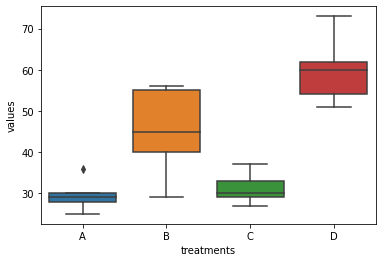

In [49]:
sns.boxplot(x=df_melt['treatments'], y=df_melt['values'], data=df_melt)

- Looking at the boxplots also shows that the mean of these 4 treatment groups are not equal.

In [51]:
data2 = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")

In [53]:
data2

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4
5,6,2,5
6,7,2,2
7,8,2,4
8,9,2,2
9,10,2,3


In [57]:
data2.drop('person', axis=1, inplace=True)

In [58]:
data2

,dose,libido
0,1,3
1,1,2
2,1,1
3,1,1
4,1,4
5,2,5
6,2,2
7,2,4
8,2,2
9,2,3


In [60]:
data2['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

In [61]:
data2

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4
5,low,5
6,low,2
7,low,4
8,low,2
9,low,3


In [66]:
stats.f_oneway(data2[data2['dose'] == 'placebo']['libido'], data2[data2['dose'] == 'low']['libido'], data2[data2['dose'] == 'high']['libido'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

<AxesSubplot:xlabel='dose', ylabel='libido'>

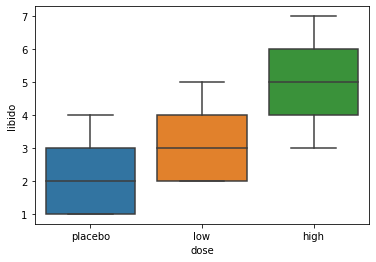

In [67]:
sns.boxplot(x=data2['dose'], y=data2['libido'], data=data2)

In [69]:
model = ols('libido~ C(dose)', data=data2).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,20.133333,10.066667,5.118644,0.024694
Residual,12.0,23.600000,1.966667,NaN,NaN
